# bar plot of znf304 expression in cimp+ labelled by braf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gene = "ZNF304"

# load expression data
exprorig = pd.read_csv("../raw-data/tcga-data/COADREAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt",sep="\t",index_col=0,low_memory=False)
exprorig = exprorig.drop("gene_id")
exprorig.index = [x.split("|")[0] for x in exprorig.index]
exprorig.columns = [x[:15] for x in exprorig.columns]
keep = [x for x in exprorig if x[-2:] == "01"]
exprorig = exprorig[keep]
exprorig = exprorig.astype(float)

# load class data
classtmp = pd.read_csv("../raw-data/crcclasses.csv", skiprows=1, index_col=0, header=None)
classtmp.index = [x.replace('.','-') for x in classtmp.index]
crcclasses = pd.concat([classtmp, pd.read_csv("../raw-data/crcclasses2.csv", index_col=0, header=None)], axis=0)
crcclasses = crcclasses[~crcclasses.index.duplicated(keep='first')] # drop duplicates
posdf = crcclasses[crcclasses[2] == "CIMP+"]
negdf  = crcclasses[crcclasses[2] == "CIMP-"]

# load mutation data
muts = pd.read_csv("../raw-data/feat-matrices/pancanCOADREAD-filtered.csv",index_col=0)
muts = muts[muts["BRAF_GRCh38_7:140753336-140753336_Missense-Mutation_SNP_A-A-T"] == 1.0]
exprpos = exprorig[[x for x in exprorig.columns if x in posdf.index]]
exprneg = exprorig[[x for x in exprorig.columns if x in negdf.index]]
rawmuts = pd.concat([pd.read_csv("../raw-data/tcga-data/COADsomatic.csv"),pd.read_csv("../raw-data/tcga-data/READsomatic.csv")])
rawmuts = rawmuts[rawmuts["Hugo_Symbol"]=="KRAS"]
kraspos = set([x[:15] for x in rawmuts["Tumor_Sample_Barcode"] if x[:15][-2:] == "01"]) # get all KRAS mutated samples which are cancerous
exprkras = exprorig[[x for x in exprorig.columns if x in kraspos]]
exprkrasneg = exprorig[[x for x in exprorig.columns if x not in kraspos]]
exprkrascimp = exprkras[[x for x in exprkras.columns if x in posdf.index]]
exprbraf = exprorig[[x for x in exprorig.columns if x in muts.index]]
exprbrafneg = exprorig[[x for x in exprorig.columns if x not in muts.index]]
exprbrafcimp = exprorig[[x for x in exprorig.columns if x in muts[muts["class"] == 1.0].index]]

exprbraf

TCGA-A6-2686-01  TCGA-A6-5661-01  TCGA-A6-5665-01  TCGA-A6-6649-01  \
?                   0.0000           0.0000           0.0000           0.0000   
?                  40.3901           9.5987           9.1192          31.2876   
?                  22.0185           1.8673           4.0154          21.0125   
?                  89.0639         219.0581         270.2215         150.0566   
?                 747.9278        1178.5422        1288.6006         858.4868   
?                   0.0000           0.0000           0.0000           0.0000   
?                 183.8128          24.5700          83.4987         228.6534   
?                   0.4876           0.0000           0.4691           1.2756   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.4876           0.8190           0.0000           0.6378   
?                   3.4130           0.8190           0.0000           1.9134   
?                   6.8259           4.9140           3.2837           4.1457   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.9751           0.0000           0.0000           0.3189   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.0000           0.0000           0.0000           0.3189   
?                 206.7284         414.4144          98.9788         749.4220   
?                  13.1643           7.3710           4.2218          13.3939   
?                   0.0000           0.0000           0.0000          25.3847   
?                1473.9152         146.6011         234.5469         133.6203   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.0000           0.0000           0.0000           0.0000   
?                   0.0000           0.0000           0.4691           0.6378   
?                   0.9751           0.0000           1.4073           0.3189   
?                 682.5939         478.2965        1109.4067         741.7683   
?                   3.9005           2.4570           3.7528           2.5512   
A1BG               75.9581           9.6888           7.5055          18.1775   
...                    ...              ...              ...              ...   
ZSCAN20            50.2194          51.5971          26.7383          81.9581   
ZSCAN21           176.6553          86.8468         140.2590         146.9919   
ZSCAN22           173.0863         101.5561          72.7095          97.2654   
ZSCAN23             2.4378           1.6380           0.4691          20.4098   
ZSCAN29           313.5056         518.4275         416.0862         701.2676   
ZSCAN2            140.4193          76.1671         118.2116         164.2350   
ZSCAN4              1.9503           2.4570           0.0000           3.8268   
ZSCAN5A           104.8269          82.7191          72.7095          58.9971   
ZSCAN5B             4.8757           0.8190           0.9382           0.9567   
ZSWIM1            683.0814         217.8542         263.1616         252.5712   
ZSWIM2              0.0000           0.0000           0.0000           0.0000   
ZSWIM3            235.4949          55.6921          39.8730          97.5843   
ZSWIM4            384.2028         176.0852         189.9830         417.4440   
ZSWIM5            166.7479         129.4021         151.0482         391.6129   
ZSWIM6            312.0429         343.1613         225.1650         460.8148   
ZSWIM7            558.4447         268.7224         199.5150         135.2117   
ZUFSP             130.6680         313.6773         222.3504         137.7661   
ZW10              482.2038         614.250

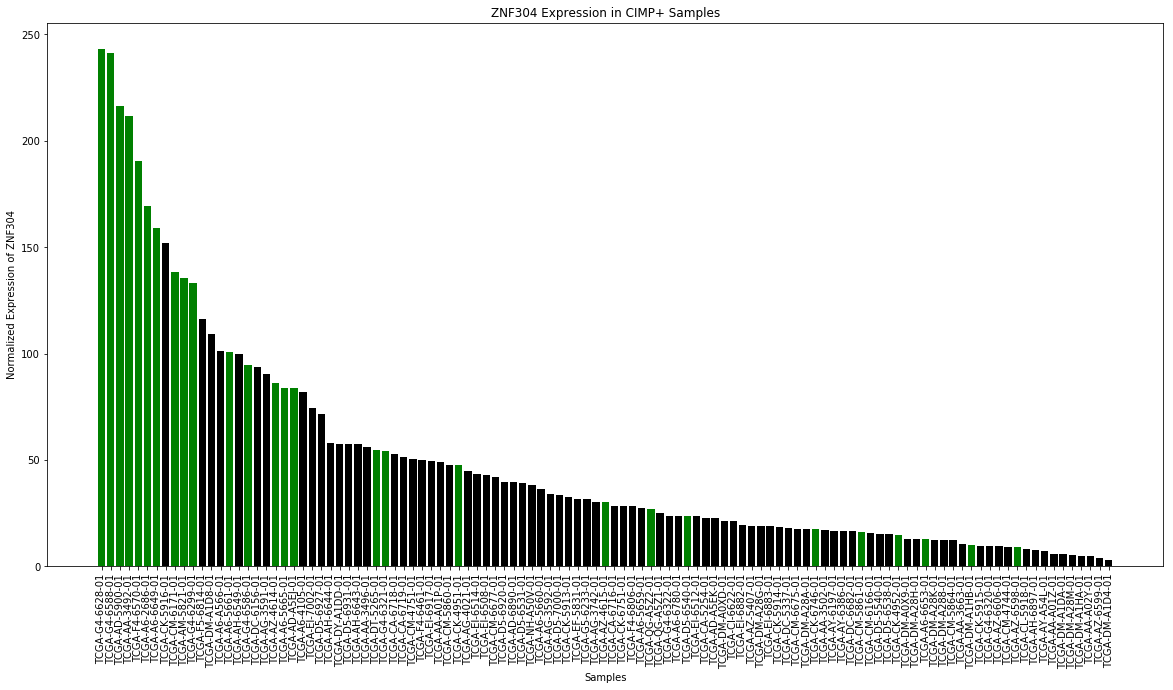

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


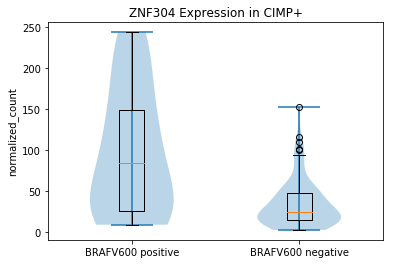

In [2]:
selected = exprpos.loc[gene].sort_values(ascending=False)

plt.figure(figsize=(20,10))
mycolors = ["green" if x in muts.index else "black" for x in selected.index]
plt.bar(range(1,len(selected)+1),selected.values,color=mycolors)
plt.xticks(range(1,len(selected)+1),selected.index,rotation=90)
plt.xlabel("Samples")
plt.ylabel("Normalized Expression of ZNF304")
plt.title("ZNF304 Expression in CIMP+ Samples")
plt.show()

fig, ax = plt.subplots()
brafneg = [x for x in selected.index if x not in muts.index]
ax.boxplot([selected.loc[muts.index].dropna().values,selected.loc[brafneg].dropna().values],labels=["BRAFV600 positive","BRAFV600 negative"])
ax.violinplot([selected.loc[muts.index].dropna().values,selected.loc[brafneg].dropna().values])
plt.title(gene+" Expression in CIMP+")
plt.ylabel("normalized_count")
plt.show()

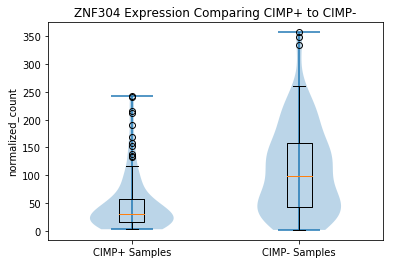

In [3]:
fig, ax = plt.subplots()
ax.boxplot([exprpos.loc[gene].values,exprneg.loc[gene].values],labels=["CIMP+ Samples","CIMP- Samples"])
ax.violinplot([exprpos.loc[gene].values,exprneg.loc[gene].values])
plt.title(gene+" Expression Comparing CIMP+ to CIMP-")
plt.ylabel("normalized_count")
plt.show()

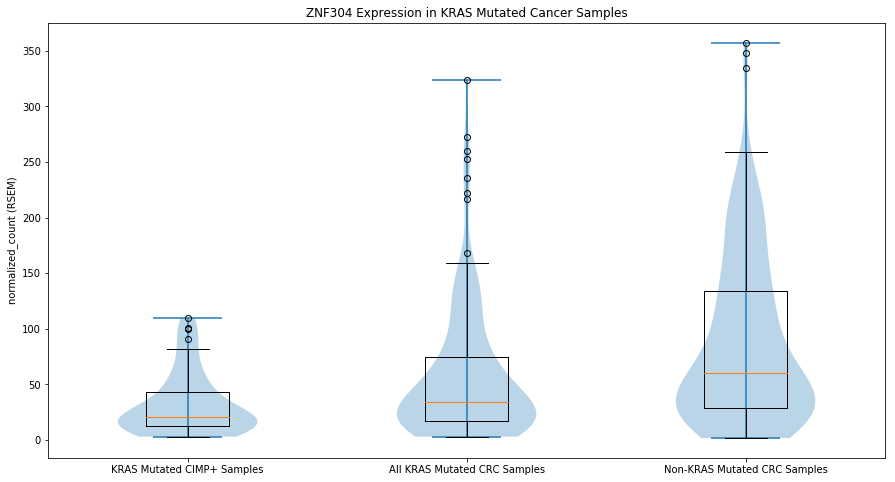

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot([exprkrascimp.loc[gene].values,exprkras.loc[gene].values,exprkrasneg.loc[gene].values],labels=["KRAS Mutated CIMP+ Samples","All KRAS Mutated CRC Samples","Non-KRAS Mutated CRC Samples"])
ax.violinplot([exprkrascimp.loc[gene].values,exprkras.loc[gene].values,exprkrasneg.loc[gene].values])
plt.title(gene+" Expression in KRAS Mutated Cancer Samples")
plt.ylabel("normalized_count (RSEM)")
plt.show()

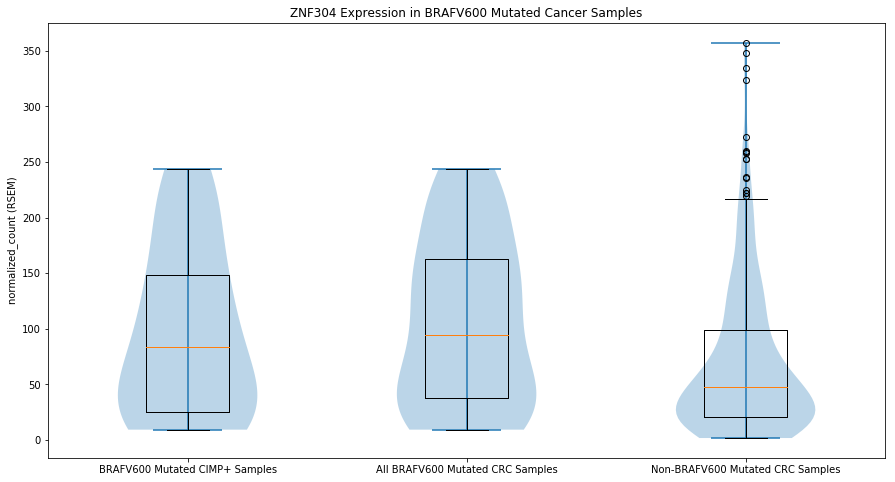

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot([exprbrafcimp.loc[gene].values,exprbraf.loc[gene].values,exprbrafneg.loc[gene].values],labels=["BRAFV600 Mutated CIMP+ Samples","All BRAFV600 Mutated CRC Samples","Non-BRAFV600 Mutated CRC Samples"])
ax.violinplot([exprbrafcimp.loc[gene].values,exprbraf.loc[gene].values,exprbrafneg.loc[gene].values])
plt.title(gene+" Expression in BRAFV600 Mutated Cancer Samples")
plt.ylabel("normalized_count (RSEM)")
plt.show()